In [1]:
import pandas as pd
import joblib
import time
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
centers=pd.read_csv('DATA/fulfilment_center_info.csv')
meals=pd.read_csv('DATA/meal_info.csv')
df=pd.read_csv('DATA/train.csv')

#### Understand the dataset

In [3]:
centers.head()

,center_id,city_code,region_code,center_type,op_area
0,11,679,56,TYPE_A,3.7
1,13,590,56,TYPE_B,6.7
2,124,590,56,TYPE_C,4.0
3,66,648,34,TYPE_A,4.1
4,94,632,34,TYPE_C,3.6


In [4]:
meals.head()

,meal_id,category,cuisine
0,1885,Beverages,Thai
1,1993,Beverages,Thai
2,2539,Beverages,Thai
3,1248,Beverages,Indian
4,2631,Beverages,Indian


In [5]:
df.head()

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders
0,1379560,1,55,1885,136.83,152.29,0,0,177
1,1466964,1,55,1993,136.83,135.83,0,0,270
2,1346989,1,55,2539,134.86,135.86,0,0,189
3,1338232,1,55,2139,339.50,437.53,0,0,54
4,1448490,1,55,2631,243.50,242.50,0,0,40


In [6]:
centers['center_type'].unique()

array(['TYPE_A', 'TYPE_B', 'TYPE_C'], dtype=object)

In [15]:
meals.category.unique()

array(['Beverages', 'Extras', 'Soup', 'Other Snacks', 'Salad',
       'Rice Bowl', 'Starters', 'Sandwich', 'Pasta', 'Desert', 'Biryani',
       'Pizza', 'Fish', 'Seafood'], dtype=object)

In [16]:
meals.cuisine.unique()

array(['Thai', 'Indian', 'Italian', 'Continental'], dtype=object)

In [17]:
len(df['week'].unique())
# in this data set ,there are 145 unique weeks

145

### merge the data set

In [7]:
df=df.merge(centers,on='center_id')
df=df.merge(meals,on='meal_id')

In [8]:
df.head()

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders,city_code,region_code,center_type,op_area,category,cuisine
0,1379560,1,55,1885,136.83,152.29,0,0,177,647,56,TYPE_C,2.0,Beverages,Thai
1,1018704,2,55,1885,135.83,152.29,0,0,323,647,56,TYPE_C,2.0,Beverages,Thai
2,1196273,3,55,1885,132.92,133.92,0,0,96,647,56,TYPE_C,2.0,Beverages,Thai
3,1116527,4,55,1885,135.86,134.86,0,0,163,647,56,TYPE_C,2.0,Beverages,Thai
4,1343872,5,55,1885,146.50,147.50,0,0,215,647,56,TYPE_C,2.0,Beverages,Thai


In [20]:
df.shape

(456548, 15)

In [21]:
df.groupby(['cuisine', 'category']).size().reset_index(name='count').sort_values(by=['cuisine', 'count'], ascending=[True, False])

,cuisine,category,count
2,Continental,Pizza,33138
0,Continental,Beverages,32554
3,Continental,Seafood,26916
1,Continental,Fish,10187
7,Indian,Rice Bowl,33408
4,Indian,Beverages,29296
6,Indian,Desert,29294
5,Indian,Biryani,20614
8,Italian,Beverages,33381
11,Italian,Sandwich,33291


#### we can understand which is more popular male in each cuisin ex(in india Rice Bowl is more popular)

In [22]:
df.groupby(['cuisine', 'category'])['meal_id'].nunique().reset_index(name='unique_meal_count')


,cuisine,category,unique_meal_count
0,Continental,Beverages,3
1,Continental,Fish,3
2,Continental,Pizza,3
3,Continental,Seafood,3
4,Indian,Beverages,3
5,Indian,Biryani,3
6,Indian,Desert,3
7,Indian,Rice Bowl,3
8,Italian,Beverages,3
9,Italian,Pasta,3


##### Here we can see that all catogory have 3 meal types

### DATA PREPROCESSING

In [9]:


df.isnull().sum()

id                       0
week                     0
center_id                0
meal_id                  0
checkout_price           0
base_price               0
emailer_for_promotion    0
homepage_featured        0
num_orders               0
city_code                0
region_code              0
center_type              0
op_area                  0
category                 0
cuisine                  0
dtype: int64

In [24]:
df.dropna(axis=0,inplace=True)

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 456548 entries, 0 to 456547
Data columns (total 15 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   id                     456548 non-null  int64  
 1   week                   456548 non-null  int64  
 2   center_id              456548 non-null  int64  
 3   meal_id                456548 non-null  int64  
 4   checkout_price         456548 non-null  float64
 5   base_price             456548 non-null  float64
 6   emailer_for_promotion  456548 non-null  int64  
 7   homepage_featured      456548 non-null  int64  
 8   num_orders             456548 non-null  int64  
 9   city_code              456548 non-null  int64  
 10  region_code            456548 non-null  int64  
 11  center_type            456548 non-null  object 
 12  op_area                456548 non-null  float64
 13  category               456548 non-null  object 
 14  cuisine                456548 non-nu

In [26]:
df[df.duplicated()]
# No duplicate value

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders,city_code,region_code,center_type,op_area,category,cuisine


### Handling Outliers

In [10]:
df1= df.copy()

In [17]:
def outlier_threshold(df,column,q1=0.25,q3=0.75):
    quantile1=df[column].quantile(q1)
    quantile3=df[column].quantile(q3)
    iqr=quantile3-quantile1
    low_limit=quantile1-1.5*iqr
    up_limit=quantile3+1.5*iqr

    return low_limit,up_limit


def check_outlier(dataframe, col_name):
  low_limit, up_limit = outlier_threshold(dataframe, col_name)
  if dataframe[(dataframe[col_name] > up_limit) | (dataframe[col_name] < low_limit)].any(axis=None):
      return True
  else:
      return False

def replace_with_threshold(df,column):
    low,upper=outlier_threshold(df,column)
    df.loc[(df[column]<low),column]=low
    df.loc[(df[column]>upper),column]=upper
    

In [18]:
columns=['checkout_price','base_price','num_orders','op_area']
for col_name in columns:
    replace_with_threshold(df1,col_name)

for col_name in columns:
    print(col_name+' :',check_outlier(df1,col_name))

checkout_price : False
base_price : False
num_orders : False
op_area : False


### Feature Engineering

In [19]:
df2=df1.copy()

In [31]:
df2.head()

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders,city_code,region_code,center_type,op_area,category,cuisine
0,1379560,1,55,1885,136.83,152.29,0,0,177,647,56,TYPE_C,2.25,Beverages,Thai
1,1018704,2,55,1885,135.83,152.29,0,0,323,647,56,TYPE_C,2.25,Beverages,Thai
2,1196273,3,55,1885,132.92,133.92,0,0,96,647,56,TYPE_C,2.25,Beverages,Thai
3,1116527,4,55,1885,135.86,134.86,0,0,163,647,56,TYPE_C,2.25,Beverages,Thai
4,1343872,5,55,1885,146.50,147.50,0,0,215,647,56,TYPE_C,2.25,Beverages,Thai


In [20]:
df2['discount_perc']=(df2['base_price']-df2['checkout_price']/df2['base_price']).round(2)
df2['discount y/n']=[1 if x>=0 else 0 for x in df2['discount_perc']]
df2['new_homepage_featured'] = df2['homepage_featured'].map({0: 'No', 1: 'Yes'})
df2['new_emailer_for_promotion']=df2['emailer_for_promotion'].map({0: 'No', 1: 'Yes'})
df2['featured_promotion']=df2['new_homepage_featured']+'-'+df2['new_emailer_for_promotion']
df2['new_category_cuisine'] = df2['category'] + '_' + df2['cuisine']
df2['new_center_type_city_code'] = df2['center_type'] + '_' + df2['city_code'].astype(str)


In [11]:
df['discount_perc'] = (df['base_price'] - df['checkout_price'] / df['base_price']).round(2)
df['discount y/n'] = [1 if x >= 0 else 0 for x in df['discount_perc']]
df['new_homepage_featured'] = df['homepage_featured'].map({0: 'No', 1: 'Yes'})
df['new_emailer_for_promotion'] = df['emailer_for_promotion'].map({0: 'No', 1: 'Yes'})
df['featured_promotion'] = df['new_homepage_featured'] + '-' + df['new_emailer_for_promotion']
df['new_category_cuisine'] = df['category'] + '_' + df['cuisine']
df['new_center_type_city_code'] = df['center_type'] + '_' + df['city_code'].astype(str)


### Feature Selection

/home/muhammed/anaconda3/lib/python3.11/site-packages/seaborn/matrix.py:260: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  annotation = ("{:" + self.fmt + "}").format(val)


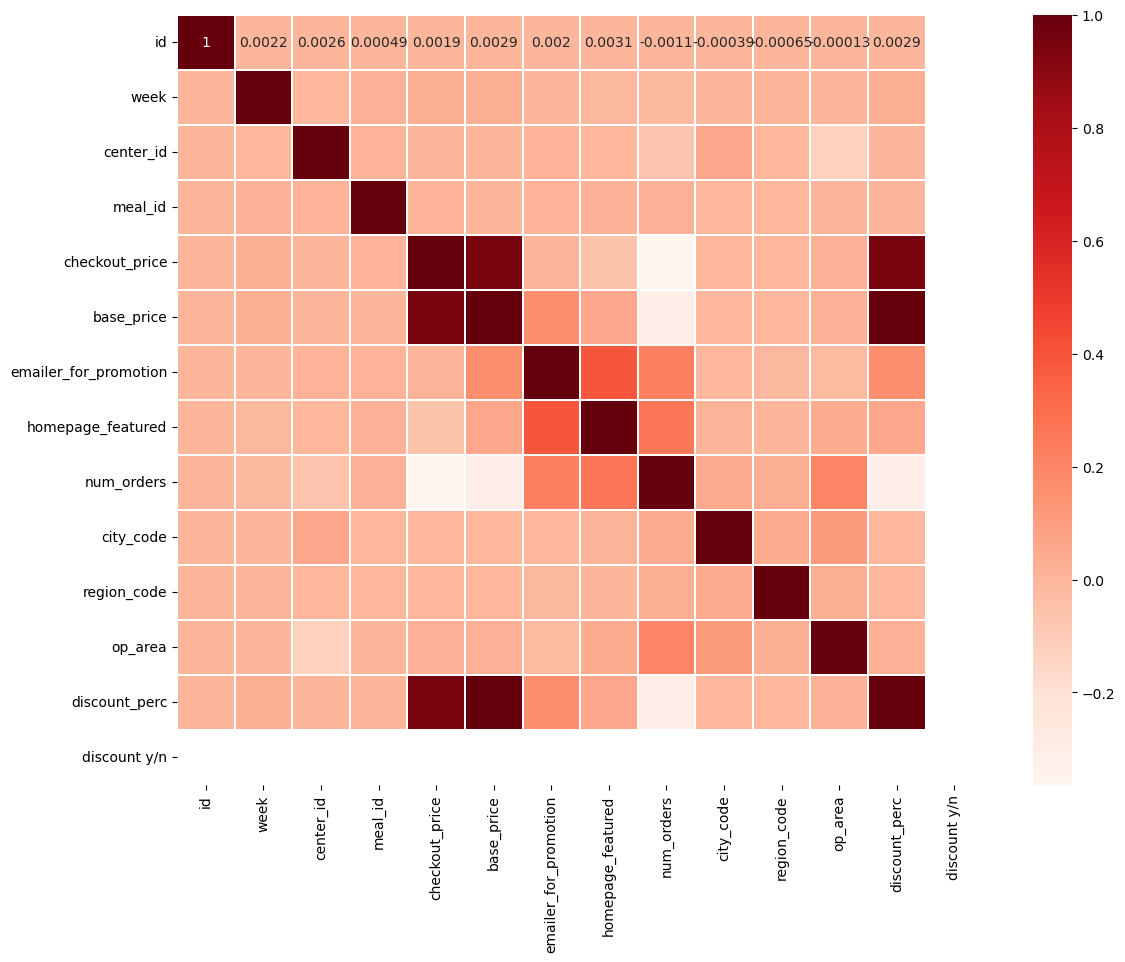

In [33]:
numeric_df2=df2.select_dtypes(['int','float'])
c=numeric_df2.corr()
plt.figure(figsize=(13,10))
sns.heatmap(c,annot=True,linewidths=0.1,cmap='Reds')
plt.show()

In [34]:
df2.columns

Index(['id', 'week', 'center_id', 'meal_id', 'checkout_price', 'base_price',
       'emailer_for_promotion', 'homepage_featured', 'num_orders', 'city_code',
       'region_code', 'center_type', 'op_area', 'category', 'cuisine',
       'discount_perc', 'discount y/n', 'new_homepage_featured',
       'new_emailer_for_promotion', 'featured_promotion',
       'new_category_cuisine', 'new_center_type_city_code'],
      dtype='object')

In [13]:
df4=df.drop(['id','base_price','emailer_for_promotion','homepage_featured','city_code','center_type','category','cuisine',
          'new_homepage_featured','new_emailer_for_promotion'],axis=1)

In [21]:
df3=df2.drop(['id','base_price','emailer_for_promotion','homepage_featured','city_code','center_type','category','cuisine',
          'new_homepage_featured','new_emailer_for_promotion'],axis=1)

In [22]:
df3.head()

,week,center_id,meal_id,checkout_price,num_orders,region_code,op_area,discount_perc,discount y/n,featured_promotion,new_category_cuisine,new_center_type_city_code
0,1,55,1885,136.83,177,56,2.25,151.39,1,No-No,Beverages_Thai,TYPE_C_647
1,2,55,1885,135.83,323,56,2.25,151.40,1,No-No,Beverages_Thai,TYPE_C_647
2,3,55,1885,132.92,96,56,2.25,132.93,1,No-No,Beverages_Thai,TYPE_C_647
3,4,55,1885,135.86,163,56,2.25,133.85,1,No-No,Beverages_Thai,TYPE_C_647
4,5,55,1885,146.50,215,56,2.25,146.51,1,No-No,Beverages_Thai,TYPE_C_647


In [37]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 456548 entries, 0 to 456547
Data columns (total 12 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   week                       456548 non-null  int64  
 1   center_id                  456548 non-null  int64  
 2   meal_id                    456548 non-null  int64  
 3   checkout_price             456548 non-null  float64
 4   num_orders                 456548 non-null  int64  
 5   region_code                456548 non-null  int64  
 6   op_area                    456548 non-null  float64
 7   discount_perc              456548 non-null  float64
 8   discount y/n               456548 non-null  int64  
 9   featured_promotion         456548 non-null  object 
 10  new_category_cuisine       456548 non-null  object 
 11  new_center_type_city_code  456548 non-null  object 
dtypes: float64(3), int64(6), object(3)
memory usage: 41.8+ MB


### Label Encoding

In [14]:
from sklearn.preprocessing import LabelEncoder

In [25]:
le=LabelEncoder()
df3['featured_promotion'] = le.fit_transform(df3['featured_promotion'])
df3['new_category_cuisine'] = le.fit_transform(df3['new_category_cuisine'])
df3['new_center_type_city_code'] = le.fit_transform(df3['new_center_type_city_code'])


In [24]:
df4['featured_promotion'] = le.fit_transform(df4['featured_promotion'])
df4['new_category_cuisine'] = le.fit_transform(df4['new_category_cuisine'])
df4['new_center_type_city_code'] = le.fit_transform(df4['new_center_type_city_code'])


In [40]:
df3.head()

,week,center_id,meal_id,checkout_price,num_orders,region_code,op_area,discount_perc,discount y/n,featured_promotion,new_category_cuisine,new_center_type_city_code
0,1,55,1885,136.83,177,56,2.25,151.39,1,0,3,57
1,2,55,1885,135.83,323,56,2.25,151.40,1,0,3,57
2,3,55,1885,132.92,96,56,2.25,132.93,1,0,3,57
3,4,55,1885,135.86,163,56,2.25,133.85,1,0,3,57
4,5,55,1885,146.50,215,56,2.25,146.51,1,0,3,57


In [26]:
df4.head()

,week,center_id,meal_id,checkout_price,num_orders,region_code,op_area,discount_perc,discount y/n,featured_promotion,new_category_cuisine,new_center_type_city_code
0,1,55,1885,136.83,177,56,2.0,151.39,1,0,3,57
1,2,55,1885,135.83,323,56,2.0,151.40,1,0,3,57
2,3,55,1885,132.92,96,56,2.0,132.93,1,0,3,57
3,4,55,1885,135.86,163,56,2.0,133.85,1,0,3,57
4,5,55,1885,146.50,215,56,2.0,146.51,1,0,3,57


In [27]:
df3.to_csv('DATA/df3.csv',index=True)

In [28]:
df4.to_csv('DATA/df4.csv',index=True)

In [75]:
df.to_csv('Model/ModelInfo.csv')